In [1]:
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
import numpy as np

In [202]:
# Generate parameters for AR(1) with phi = 0.5
ar_params = np.asarray([1, -0.8])
ma_params = np.asarray([1])
AR1 = ArmaProcess(ar_params, ma_params)
ar1_sample = AR1.generate_sample(nsample=1000)

# Generate parameters for AR{1} with phi = 1.0
ar_params2 = np.asarray([1, -1.0])
ma_params2 = np.asarray([1])
AR1_2 = ArmaProcess(ar_params2, ma_params2)
ar1_sample2 = AR1_2.generate_sample(nsample=1000)

In [203]:
all_sample = np.concatenate([ar1_sample2, ar1_sample])

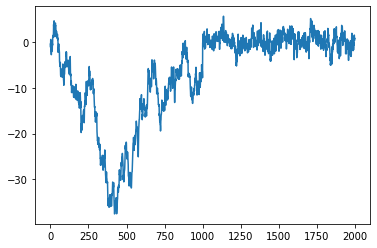

In [204]:
plt.plot(all_sample)

In [205]:
window = 20
train = np.asarray([ar1_sample[i:i+window] for i in range(len(ar1_sample) - window + 1)])[:,:,np.newaxis]
test = np.asarray([ar1_sample2[i:i+window] for i in range (len(ar1_sample2) - window + 1)])[:,:,np.newaxis]

In [206]:
from importlib import reload
import vrnngan2
vrnngan = reload(vrnngan)

In [212]:
from vrnngan2 import VRNNGRUGAN
from tensorflow import keras
import os
keras.backend.clear_session()

timesteps = train.shape[1]
feature_space = train.shape[2]
z_dim = 4
hidden_dim = 8
model = VRNNGRUGAN(feature_space, z_dim, latent_dim, timesteps, 1.0)
model.compile(keras.optimizers.Adam(lr=0.001), keras.optimizers.Adam(lr=0.1))
model.fit(train, train, batch_size= 8, epochs=100)

Epoch 1/100
123/123 [==============================] - 32s 33ms/step - total_loss: -54.5952 - loss: 52.2880 - kl: 9.1302e-07 - discrim_loss: -216.6433 - discrim_loss_fake: 53.2143 - discrim_loss_real: -53.2143 - misled_loss: 108.3216
Epoch 2/100
123/123 [==============================] - 4s 32ms/step - total_loss: -286.1115 - loss: 51.2729 - kl: 1.0019e-04 - discrim_loss: -659.0609 - discrim_loss_fake: 276.4826 - discrim_loss_real: -276.4826 - misled_loss: 329.5304
Epoch 3/100
123/123 [==============================] - 4s 32ms/step - total_loss: -519.2587 - loss: 26.3396 - kl: 0.0104 - discrim_loss: -1086.1989 - discrim_loss_fake: 490.8592 - discrim_loss_real: -490.8592 - misled_loss: 543.0994
Epoch 4/100
123/123 [==============================] - 4s 32ms/step - total_loss: -732.4222 - loss: 22.7038 - kl: 0.0823 - discrim_loss: -1509.5486 - discrim_loss_fake: 702.8231 - discrim_loss_real: -702.8231 - misled_loss: 754.7743
Epoch 5/100
123/123 [==============================] - 4s 31ms/s

123/123 [==============================] - 4s 31ms/step - total_loss: -7229.1035 - loss: 16.2973 - kl: 0.3191 - discrim_loss: -14491.9180 - discrim_loss_fake: 7194.5226 - discrim_loss_real: -7194.5226 - misled_loss: 7245.9590
Epoch 36/100
123/123 [==============================] - 4s 31ms/step - total_loss: -7438.1406 - loss: 16.6708 - kl: 0.3019 - discrim_loss: -14910.1611 - discrim_loss_fake: 7403.6435 - discrim_loss_real: -7403.6435 - misled_loss: 7455.0806
Epoch 37/100
123/123 [==============================] - 4s 31ms/step - total_loss: -7639.5571 - loss: 16.7373 - kl: 0.3014 - discrim_loss: -15312.6650 - discrim_loss_fake: 7609.3928 - discrim_loss_real: -7609.3928 - misled_loss: 7656.3325
Epoch 38/100
123/123 [==============================] - 4s 32ms/step - total_loss: -7852.6099 - loss: 16.5731 - kl: 0.3186 - discrim_loss: -15738.6367 - discrim_loss_fake: 7818.8486 - discrim_loss_real: -7818.8486 - misled_loss: 7869.3184
Epoch 39/100
123/123 [==============================] - 4

Epoch 69/100
123/123 [==============================] - 4s 31ms/step - total_loss: -14338.5439 - loss: 16.2904 - kl: 0.1824 - discrim_loss: -28709.0996 - discrim_loss_fake: 14303.1309 - discrim_loss_real: -14303.1309 - misled_loss: 14354.5498
Epoch 70/100
123/123 [==============================] - 4s 31ms/step - total_loss: -14547.5547 - loss: 15.6710 - kl: 0.1726 - discrim_loss: -29127.1992 - discrim_loss_fake: 14512.1808 - discrim_loss_real: -14512.1808 - misled_loss: 14563.5996
Epoch 71/100
123/123 [==============================] - 4s 31ms/step - total_loss: -14756.7217 - loss: 15.8821 - kl: 0.1777 - discrim_loss: -29545.2969 - discrim_loss_fake: 14721.2291 - discrim_loss_real: -14721.2291 - misled_loss: 14772.6484
Epoch 72/100
123/123 [==============================] - 4s 31ms/step - total_loss: -14965.7051 - loss: 16.0949 - kl: 0.1739 - discrim_loss: -29963.3945 - discrim_loss_fake: 14930.2784 - discrim_loss_real: -14930.2784 - misled_loss: 14981.6973
Epoch 73/100
123/123 [======

In [190]:
model.fit(train, train, batch_size= 8, epochs=100)

Epoch 1/100
123/123 [==============================] - 4s 33ms/step - total_loss: -2098.4033 - loss: 15.5026 - kl: 0.1841 - discrim_loss: -4227.8789 - discrim_loss_fake: 2108.7952 - discrim_loss_real: -2108.7952 - misled_loss: 2113.9395
Epoch 2/100
123/123 [==============================] - 4s 33ms/step - total_loss: -2119.3145 - loss: 15.0893 - kl: 0.1894 - discrim_loss: -4269.7080 - discrim_loss_fake: 2129.7096 - discrim_loss_real: -2129.7096 - misled_loss: 2134.8540
Epoch 3/100
123/123 [==============================] - 4s 33ms/step - total_loss: -2140.1025 - loss: 15.7376 - kl: 0.2083 - discrim_loss: -4311.5366 - discrim_loss_fake: 2150.6240 - discrim_loss_real: -2150.6240 - misled_loss: 2155.7683
Epoch 4/100
123/123 [==============================] - 4s 32ms/step - total_loss: -2161.1245 - loss: 15.4339 - kl: 0.2051 - discrim_loss: -4353.3594 - discrim_loss_fake: 2171.5375 - discrim_loss_real: -2171.5375 - misled_loss: 2176.6797
Epoch 5/100
123/123 [==============================]

123/123 [==============================] - 4s 33ms/step - total_loss: -2809.2910 - loss: 15.0922 - kl: 0.1740 - discrim_loss: -5649.0723 - discrim_loss_fake: 2819.3957 - discrim_loss_real: -2819.3957 - misled_loss: 2824.5361
Epoch 36/100
123/123 [==============================] - 4s 33ms/step - total_loss: -2830.3760 - loss: 15.1430 - kl: 0.1821 - discrim_loss: -5690.8696 - discrim_loss_fake: 2840.2942 - discrim_loss_real: -2840.2942 - misled_loss: 2845.4348
Epoch 37/100
123/123 [==============================] - 4s 33ms/step - total_loss: -2851.0977 - loss: 14.4950 - kl: 0.1822 - discrim_loss: -5732.6660 - discrim_loss_fake: 2861.1926 - discrim_loss_real: -2861.1926 - misled_loss: 2866.3330
Epoch 38/100
123/123 [==============================] - 4s 33ms/step - total_loss: -2872.0635 - loss: 14.9849 - kl: 0.1927 - discrim_loss: -5774.4634 - discrim_loss_fake: 2882.0911 - discrim_loss_real: -2882.0911 - misled_loss: 2887.2317
Epoch 39/100
123/123 [==============================] - 4s 33

123/123 [==============================] - 4s 33ms/step - total_loss: -3520.2104 - loss: 14.7865 - kl: 0.1643 - discrim_loss: -7070.1709 - discrim_loss_fake: 3529.9451 - discrim_loss_real: -3529.9451 - misled_loss: 3535.0854
Epoch 70/100
123/123 [==============================] - 4s 32ms/step - total_loss: -3541.1033 - loss: 14.3686 - kl: 0.1728 - discrim_loss: -7111.9683 - discrim_loss_fake: 3550.8441 - discrim_loss_real: -3550.8441 - misled_loss: 3555.9841
Epoch 71/100
123/123 [==============================] - 4s 33ms/step - total_loss: -3562.0486 - loss: 14.5145 - kl: 0.1606 - discrim_loss: -7153.7646 - discrim_loss_fake: 3571.7423 - discrim_loss_real: -3571.7423 - misled_loss: 3576.8823
Epoch 72/100
123/123 [==============================] - 4s 33ms/step - total_loss: -3582.9709 - loss: 14.3907 - kl: 0.1612 - discrim_loss: -7195.5625 - discrim_loss_fake: 3592.6411 - discrim_loss_real: -3592.6411 - misled_loss: 3597.7812
Epoch 73/100
123/123 [==============================] - 4s 34

In [45]:
outputs, z, q_mu, p_mu, q_logvar, p_logvar, output_mean, output_logvar,_ = model.predict(test)

In [48]:
outputs, z, q_mu, p_mu, q_logvar, p_logvar, output_mean, output_logvar,_ = model.predict(train)

In [61]:
history = all_sample[1000:1010]
history = np.reshape(history, (history.shape[0], 1))
results = model.rec_gen(history, 100)


tf.Tensor([[1.3469805]], shape=(1, 1), dtype=float32)
tf.Tensor([[1.3121101]], shape=(1, 1), dtype=float32)
tf.Tensor([[1.2649901]], shape=(1, 1), dtype=float32)
tf.Tensor([[1.4576722]], shape=(1, 1), dtype=float32)
tf.Tensor([[1.8385289]], shape=(1, 1), dtype=float32)
tf.Tensor([[1.3525442]], shape=(1, 1), dtype=float32)
tf.Tensor([[1.5154812]], shape=(1, 1), dtype=float32)
tf.Tensor([[1.9273438]], shape=(1, 1), dtype=float32)
tf.Tensor([[1.5767231]], shape=(1, 1), dtype=float32)
tf.Tensor([[2.022925]], shape=(1, 1), dtype=float32)
tf.Tensor([[1.9305615]], shape=(1, 1), dtype=float32)
tf.Tensor([[1.3264167]], shape=(1, 1), dtype=float32)
tf.Tensor([[1.4679875]], shape=(1, 1), dtype=float32)
tf.Tensor([[1.1657073]], shape=(1, 1), dtype=float32)
tf.Tensor([[1.2779429]], shape=(1, 1), dtype=float32)
tf.Tensor([[1.2787718]], shape=(1, 1), dtype=float32)
tf.Tensor([[1.3114206]], shape=(1, 1), dtype=float32)
tf.Tensor([[1.3087257]], shape=(1, 1), dtype=float32)
tf.Tensor([[1.2610774]], shap

(-10.0, 10.0)

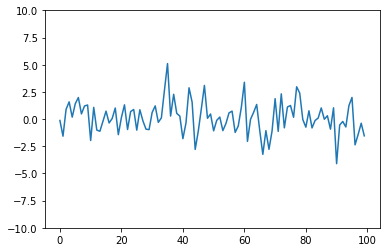

In [62]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.squeeze(results))
plt.ylim([-10,10])

In [71]:
sample = all_sample[:2]

In [73]:
np.reshape(sample[1]

2.4709196947528036

In [195]:
sample = all_sample[1000:1010]
results = []
state = None

for i in range(sample.shape[0]):
    inp = np.reshape(np.asarray(sample[i]), (1,1))
    outputs, state = model.vrnn_cell(inp, states=state, inference=True)
    results.append(outputs[0].numpy())
    state = [state]


In [196]:
results

[array([[-0.61025935]], dtype=float32),
 array([[-0.31097606]], dtype=float32),
 array([[1.2257732]], dtype=float32),
 array([[-1.867199]], dtype=float32),
 array([[0.14607309]], dtype=float32),
 array([[0.3674968]], dtype=float32),
 array([[-0.09521774]], dtype=float32),
 array([[0.57539934]], dtype=float32),
 array([[-0.16620894]], dtype=float32),
 array([[-0.10800996]], dtype=float32)]

In [82]:
all_sample[:10]

array([ 1.59094473,  2.47091969,  2.06751922,  1.31741995, -1.3532609 ,
       -1.55548896, -0.52395437, -0.48088576, -0.05061439, -0.79037532])

(-10.0, 10.0)

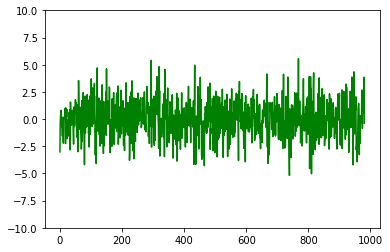

In [46]:
import matplotlib.pyplot as plt
plt.plot(outputs[:,-1,:], label='predicted', color='green')
plt.ylim([-10,10])

In [85]:
model.save_weights('vrnngan_ar_mix/vrnngan_ar_mix')

In [47]:
output_logvar

array([[[0.76979536],
        [1.2070837 ],
        [1.5219525 ],
        ...,
        [1.6985432 ],
        [1.4106805 ],
        [1.7461207 ]],

       [[1.3074989 ],
        [2.5404918 ],
        [1.6182864 ],
        ...,
        [1.3737599 ],
        [1.7780994 ],
        [1.3186988 ]],

       [[1.2207961 ],
        [1.8572481 ],
        [1.8351923 ],
        ...,
        [1.2346956 ],
        [1.3927209 ],
        [1.4447644 ]],

       ...,

       [[1.6199411 ],
        [3.03318   ],
        [2.0880752 ],
        ...,
        [1.428917  ],
        [1.479166  ],
        [1.3134329 ]],

       [[2.1106937 ],
        [1.8034691 ],
        [1.3852271 ],
        ...,
        [1.5439577 ],
        [1.5243273 ],
        [1.4399766 ]],

       [[1.706568  ],
        [1.8644767 ],
        [1.3391348 ],
        ...,
        [1.221934  ],
        [1.2962865 ],
        [1.5701077 ]]], dtype=float32)

In [49]:
output_logvar

array([[[0.9749361],
        [1.490797 ],
        [1.7939472],
        ...,
        [1.4997733],
        [2.1554503],
        [1.9564192]],

       [[0.8762836],
        [1.1673932],
        [1.4296398],
        ...,
        [1.1593375],
        [1.4785458],
        [1.4607835]],

       [[1.1352748],
        [1.5505363],
        [1.8061168],
        ...,
        [1.5137576],
        [1.3158495],
        [1.743006 ]],

       ...,

       [[1.389211 ],
        [1.3945657],
        [1.6860974],
        ...,
        [1.7522663],
        [1.4585972],
        [1.40649  ]],

       [[0.8032018],
        [1.3608419],
        [1.7522684],
        ...,
        [1.4761373],
        [1.4398439],
        [1.6503702]],

       [[0.9139242],
        [1.3364618],
        [1.3355739],
        ...,
        [1.5432785],
        [1.3446728],
        [1.5788549]]], dtype=float32)